###  Name : Nyokabi Waiganjo


# Predicting Customer Churn in a Telecommunications Company: A Machine Learning Approach

### Project Overview

SyriaTel, a telecommunications company, is facing challenges with customer churn. Churn refers to customers terminating their subscription with the company.
The objective of this project is to build a classifier that can predict whether a customer is likely to churn in the near future.
By identifying predictable patterns and high-risk customers, SyriaTel aims to implement targeted retention strategies and reduce the financial loss caused by customer churn.
By implementing an effective churn prediction model, SyriaTel can take proactive measures to retain valuable customers, optimize marketing campaigns, improve customer satisfaction, and reduce financial losses associated with customer churn.


### Business Problem

SyriaTel, a telecommunications company, is facing challenges with customer churn. Churn refers to customers who terminate their subscription with the company. This impacts SyriaTel financially, acquiring new customers is more expensive than retaining existing ones. Therefore, SyriaTel wants to build a classifier that can predict whether a customer is likely to churn in the near future. By identifying predictable patterns, SyriaTel aims to implement targeted retention strategies and reduce the financial loss caused by customer churn.

### Objective


The main objective of this project is to develop a predictive model that can effectively classify customers as churn or non-churn based on their historical data and behavioral patterns. By achieving this objective, SyriaTel can take targeted retention actions and implement customer-centric strategies to reduce churn rates and improve customer satisfaction.

### Data Understanding

In data understanding we want to thoroughly understand the data. this is by identifying any issues, and exploring relationships within the dataset. We can gain insights into the factors that contribute to customer churn. Understanding the data will guide us in building an effective classifier to predict customer churn and enable SyriaTel to take proactive measures to retain valuable customers.

### Importing Relevant Libraries

In [282]:
# importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats as stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipe

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [283]:
# Loading the dataset
data = pd.read_csv("churn dataset.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [284]:
# checking the shape of the data
data.shape

(3333, 21)

In [285]:
# retrieving the column names 
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [286]:
# checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [287]:
# finding the columns with numeric variables
numeric_columns = data.select_dtypes(include = np.number).columns
print(numeric_columns)


Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')


In [288]:
# a function to identify the data types 
def data_type(data):
    numeric_columns = data.select_dtypes(include="int64")
    float_columns = data.select_dtypes(include="float")
    string_columns = data.select_dtypes(include="object")
    
    print(f"There are {len(numeric_columns.columns)} numerical columns and the columns are: {list(numeric_columns.columns)}")
    print(f"There are {len(float_columns.columns)} decimal columns and the columns are: {list(float_columns.columns)}")
    print(f"There are {len(string_columns.columns)} decimal columns and the columns are: {list(string_columns.columns)}")

# Call the function with your data
data_type(data)

There are 8 numerical columns and the columns are: ['account length', 'area code', 'number vmail messages', 'total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'customer service calls']
There are 8 decimal columns and the columns are: ['total day minutes', 'total day charge', 'total eve minutes', 'total eve charge', 'total night minutes', 'total night charge', 'total intl minutes', 'total intl charge']
There are 4 decimal columns and the columns are: ['state', 'phone number', 'international plan', 'voice mail plan']


### Data Preparation

### EDA

In [289]:
# data summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [290]:
# looking for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [291]:
# checking for duplicated values 
data.duplicated().sum()

0

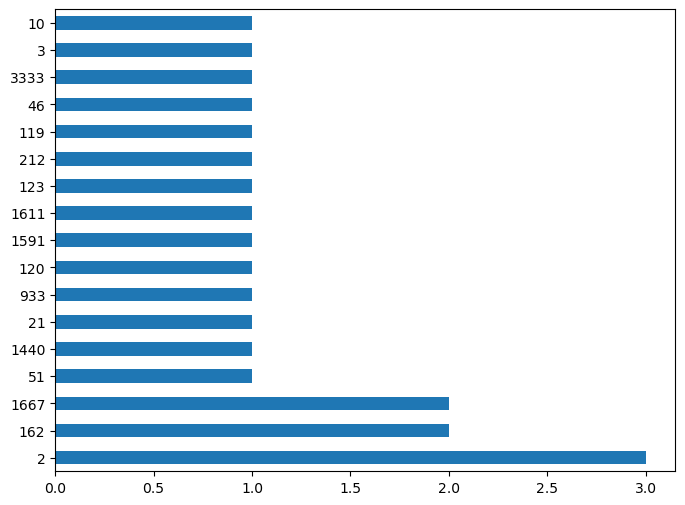

In [292]:
# visualization representing the unique values in each column
plt.figure(figsize=(8,6))
data.nunique().value_counts().plot.barh();

In [293]:
# dropping the phone number column because its the customers information and it adds no value to our analysis 
data.drop(["phone number"] , axis = 1, inplace = True )

In [294]:
# checking the shape after dropping
data.shape

(3333, 20)

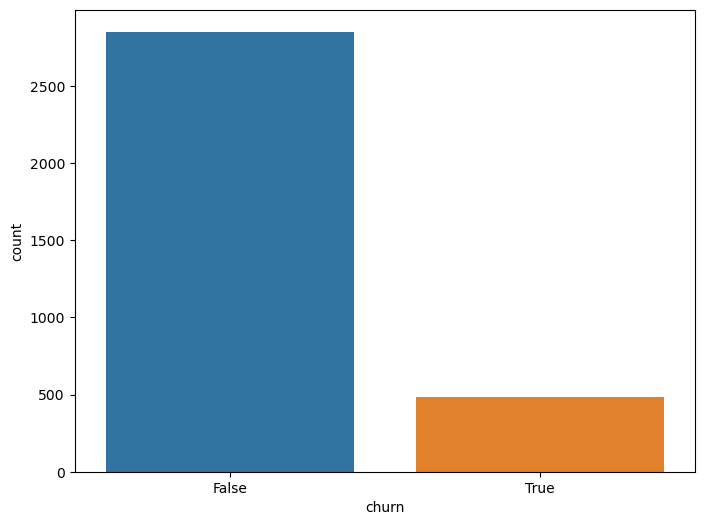

In [295]:
# churn visualization
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='churn');

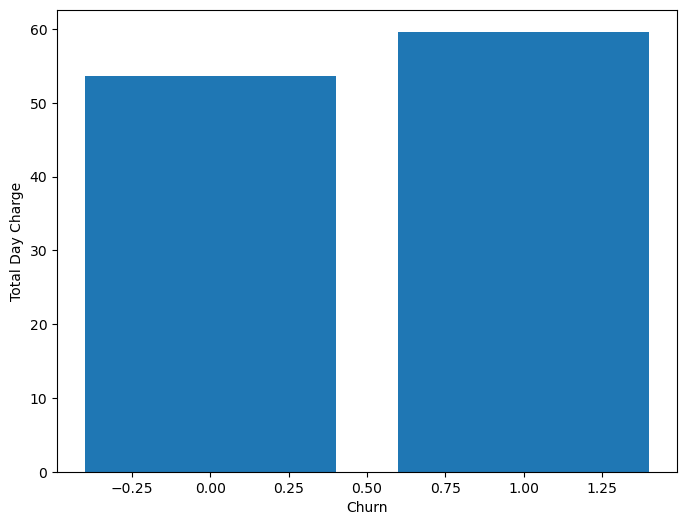

In [296]:
# visualization of the relationship between churn and total day charge
plt.figure(figsize=(8,6))
plt.bar(x = data["churn"], height=data["total day charge"])
plt.xlabel('Churn')
plt.ylabel('Total Day Charge')
plt.show()

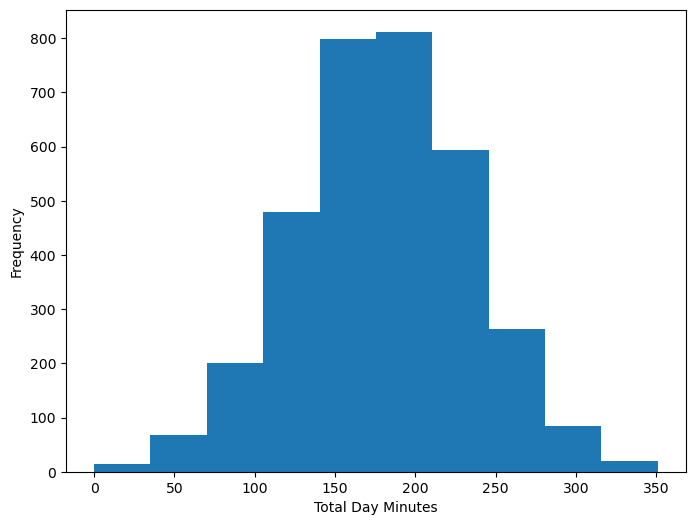

In [297]:
# a histogram visualization of total day minutes
plt.figure(figsize=(8,6))
plt.hist(data['total day minutes'], bins=10)
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')
plt.show()

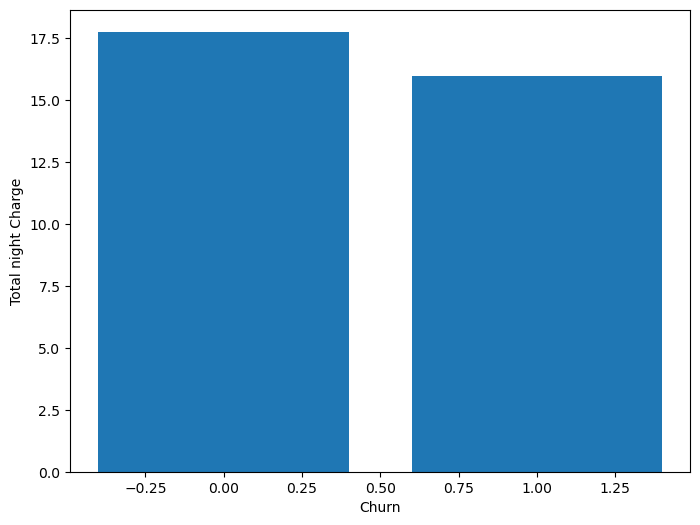

In [298]:
# visualization of the relationship between churn and total night charge
plt.figure(figsize=(8,6))
plt.bar(x = data["churn"], height=data["total night charge"])
plt.xlabel('Churn')
plt.ylabel('Total night Charge')
plt.show()

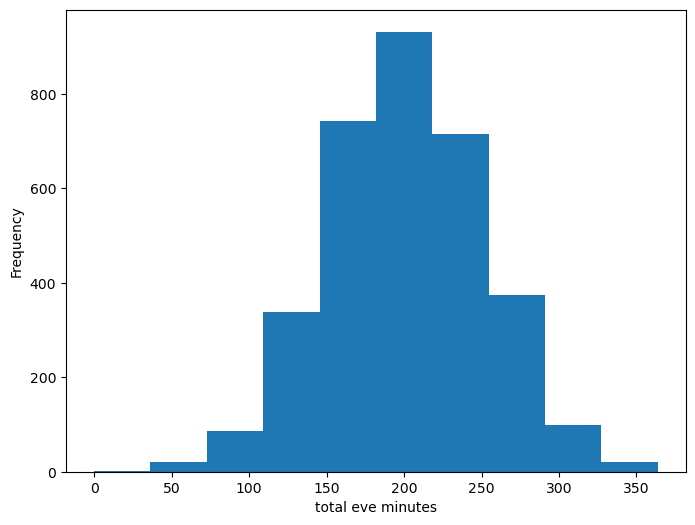

In [299]:
# histogram visualization of total eve minutes
plt.figure(figsize=(8,6))
plt.hist(data['total eve minutes'], bins=10)
plt.xlabel('total eve minutes')
plt.ylabel('Frequency')
plt.show()

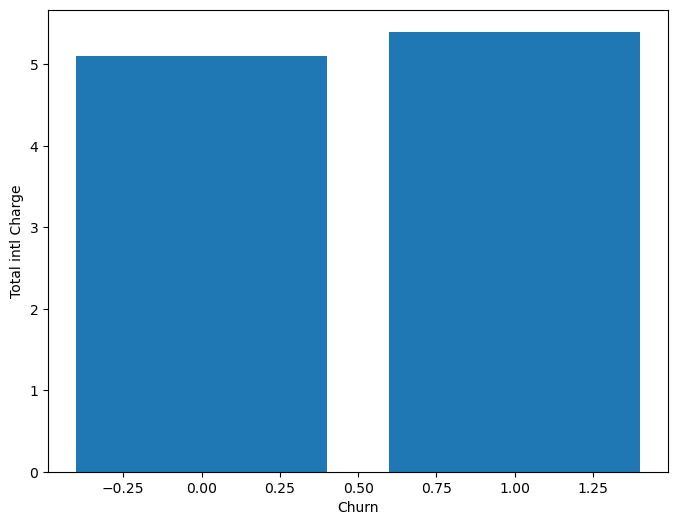

In [300]:
# visualization of the relationship between churn and total intl charge 
plt.figure(figsize=(8,6))
plt.bar(x = data["churn"], height=data["total intl charge"])
plt.xlabel('Churn')
plt.ylabel('Total intl Charge')
plt.show()

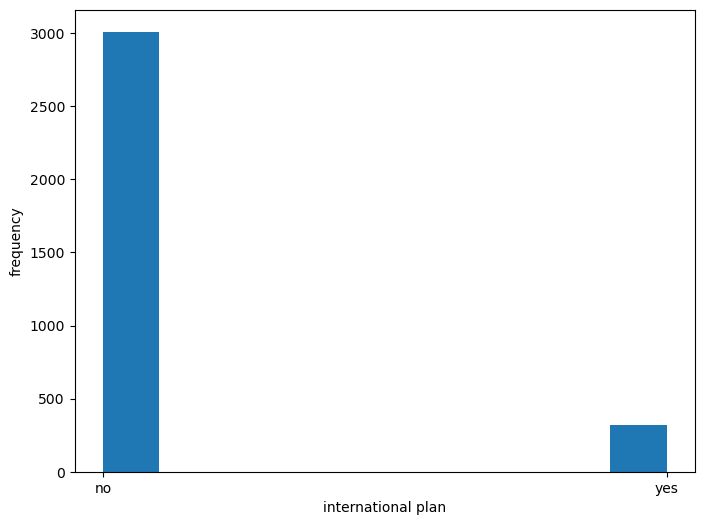

In [301]:
# visualization of the relationship between churn and international plan
plt.figure(figsize=(8,6))
plt.hist(data["international plan"])
plt.xlabel('international plan')
plt.ylabel('frequency')
plt.show()

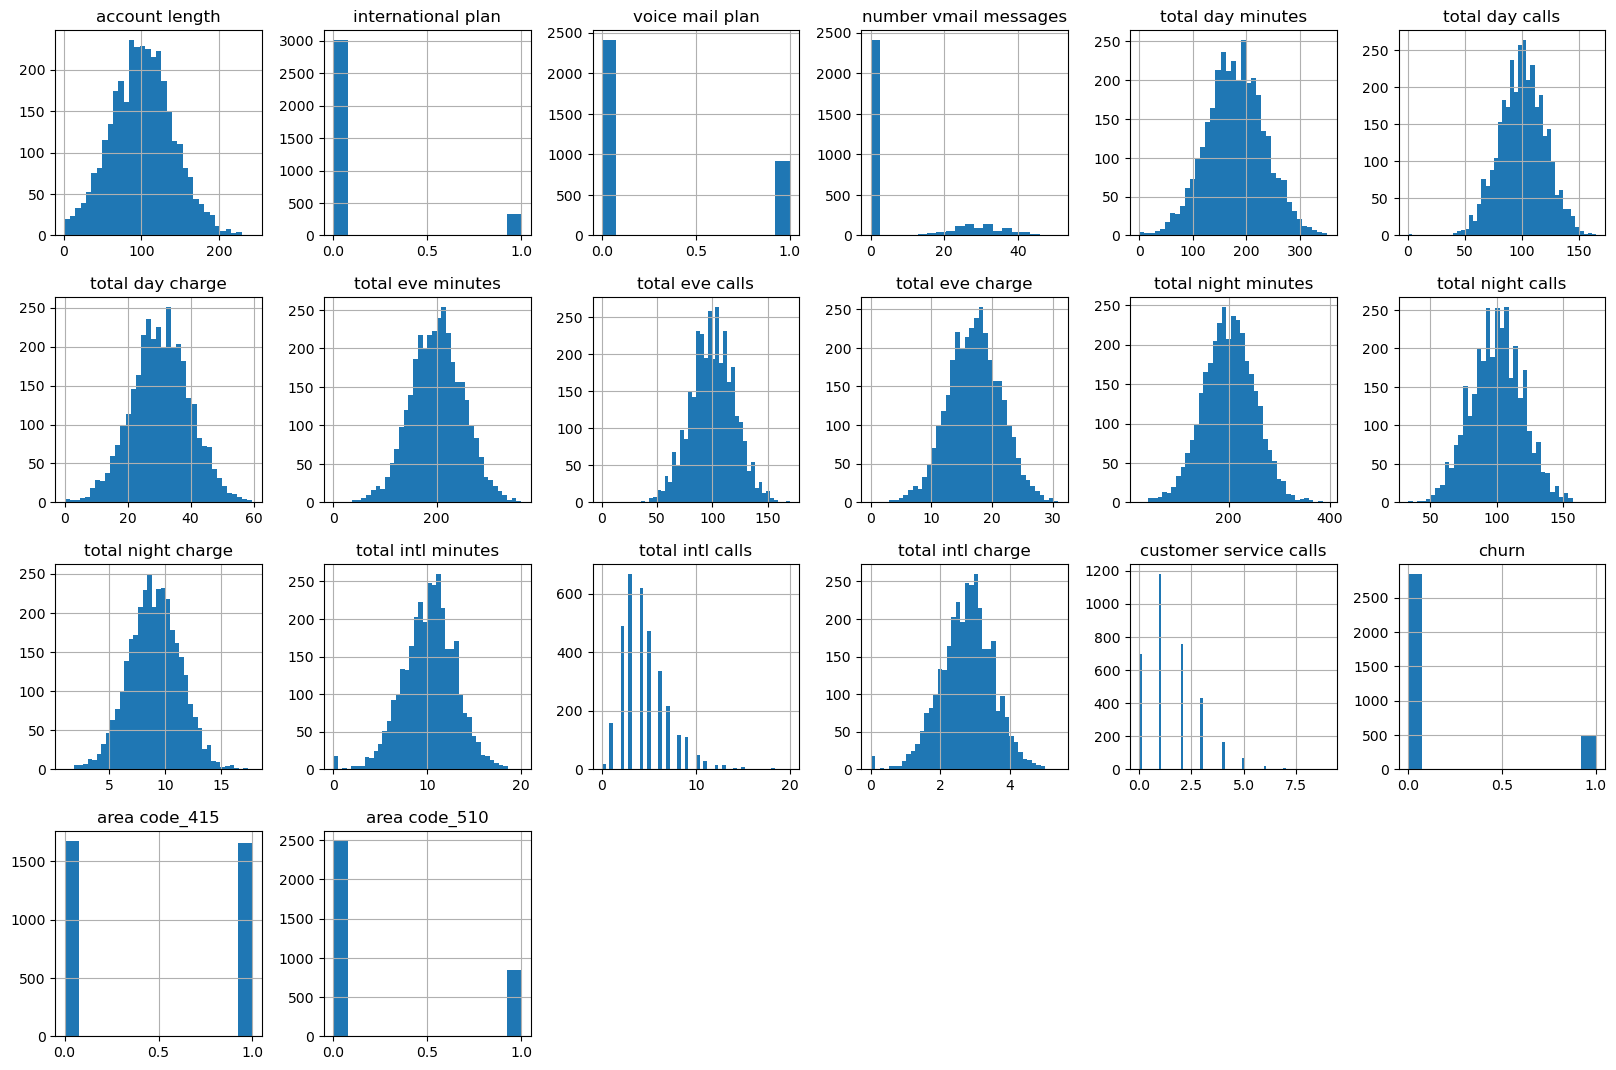

In [338]:
# Check the distribution of the data
data.hist(bins = 'auto', layout = (6,6), figsize = (20,20))
plt.show()

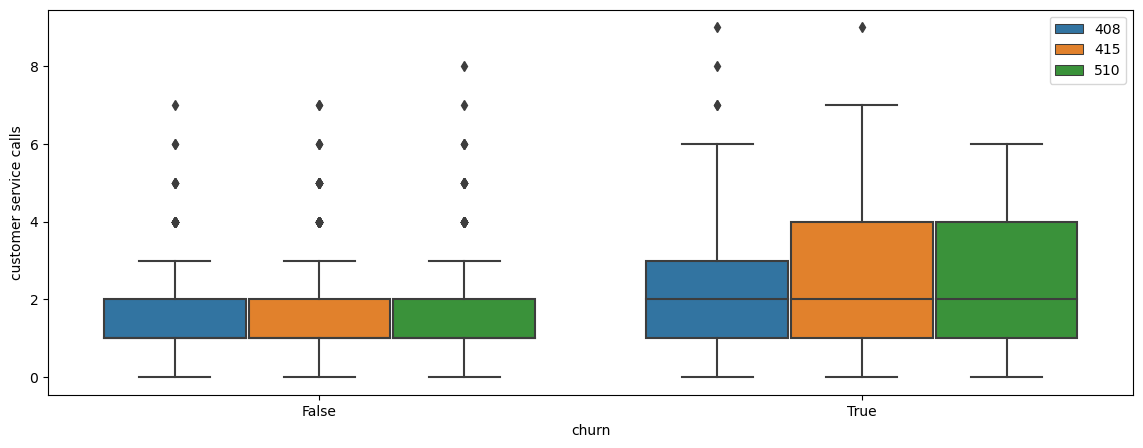

In [302]:
# Boxplot to see which area code has the highest churn
plt.figure(figsize=(14,5))
sns.boxplot(data=data,x='churn',y='customer service calls',hue='area code');
plt.legend(loc='upper right');


In [303]:
# identifying the columns with outliers
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    if (data[column] > upper).any():
        print(column, "yes")
    else:
        print(column, "no")


account length yes
area code no
number vmail messages yes
total day minutes yes
total day calls yes
total day charge yes
total eve minutes yes
total eve calls yes
total eve charge yes
total night minutes yes
total night calls yes
total night charge yes
total intl minutes yes
total intl calls yes
total intl charge yes
customer service calls yes


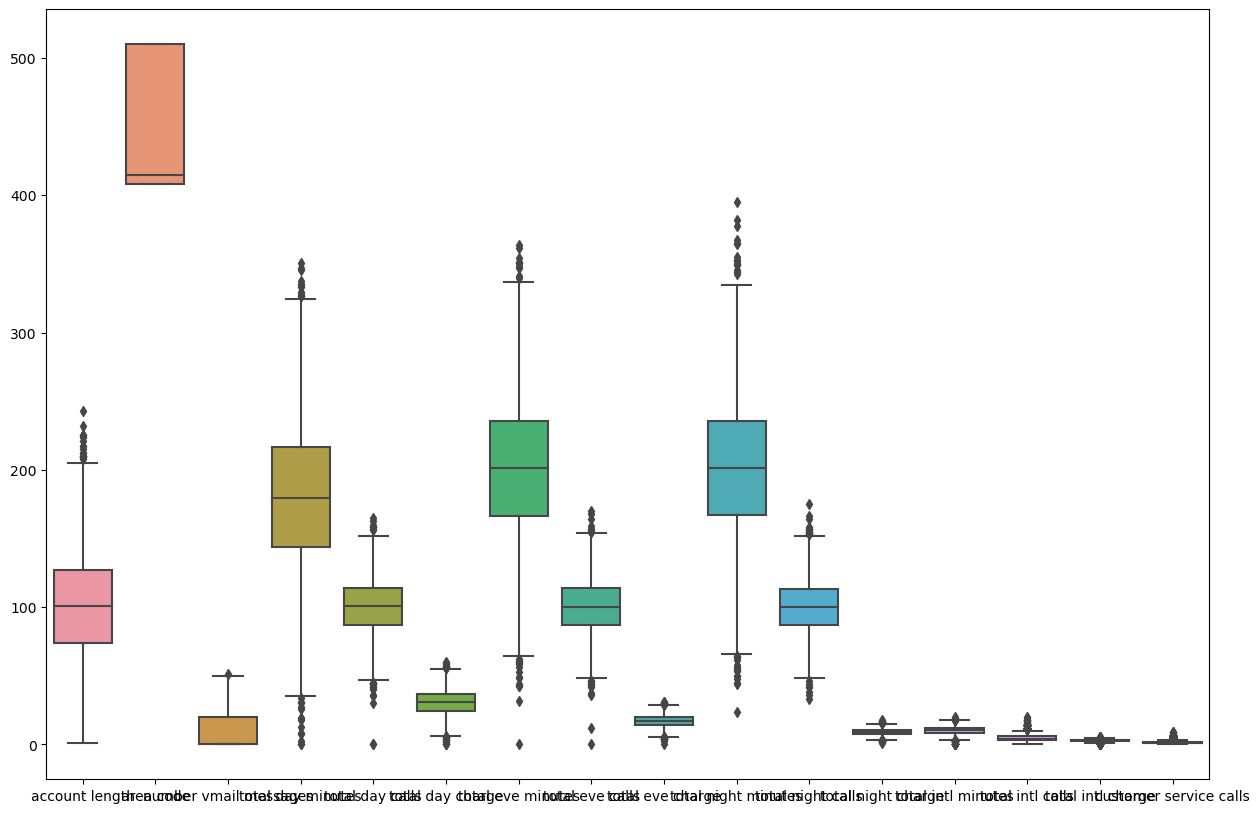

In [304]:
# visualization checking for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[numeric_columns])
plt.show()

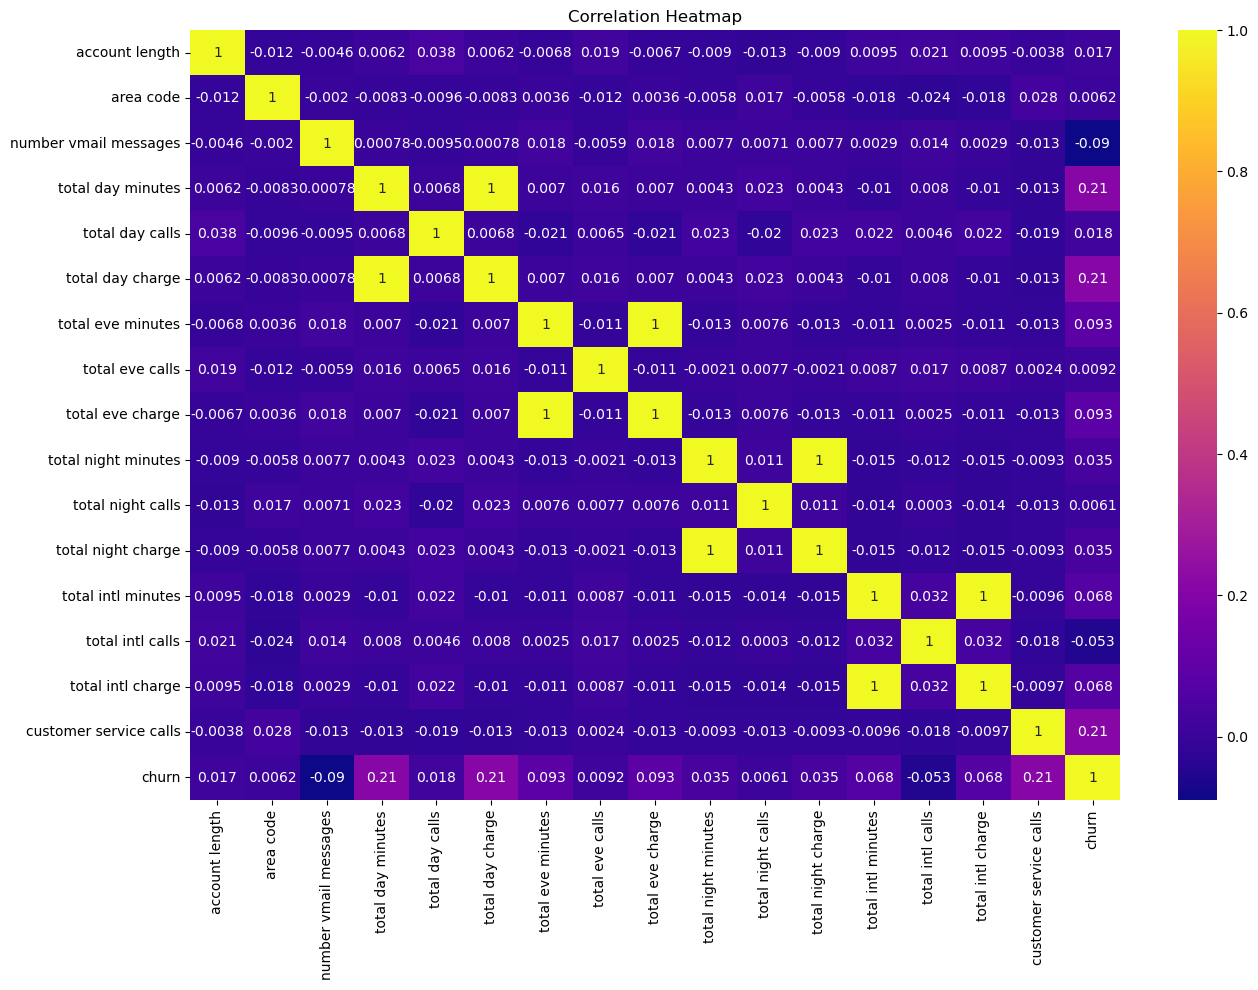

In [305]:
# checking for correlation in the dataset
data.corr()
# plotting a correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='plasma')
plt.title('Correlation Heatmap')
plt.show()

In [306]:
#correlation between churn and other columns
data.corr()["churn"].sort_values()

number vmail messages    -0.089728
total intl calls         -0.052844
total night calls         0.006141
area code                 0.006174
total eve calls           0.009233
account length            0.016541
total day calls           0.018459
total night minutes       0.035493
total night charge        0.035496
total intl minutes        0.068239
total intl charge         0.068259
total eve charge          0.092786
total eve minutes         0.092796
total day charge          0.205151
total day minutes         0.205151
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

### Feature Engineering

#### One Hot Encoding

In [307]:
data['churn'] = data['churn'].replace({True: 1, False: 0}).astype(int)
data['churn']

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int32

In [308]:
# One-hot-encoding some categorical columns
# Area code
data = pd.get_dummies(data, columns=['area code'], drop_first=True)

# Binary-encoding the other categorical columns
# Voicemail
data['voice mail plan'] = data['voice mail plan'].map({'yes': 1, 'no': 0})

# International Plan
data['international plan'] = data['international plan'].map({'yes': 1, 'no': 0})


###  Scaling

In [309]:
y = data["churn"]
X = data.drop(["churn", "state"], axis = 1)

In [310]:
# splitting the dataset into training and testing
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1)

In [311]:
# Create a SMOTE object
smote = SMOTE()

# Oversample the data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [312]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled, X_test_scaled)

[[-0.53053508 -0.30863645 -0.45381141 ...  0.16875115 -0.80635189
   2.16596001]
 [ 0.73993082 -0.30863645 -0.45381141 ... -0.52682689 -0.80635189
  -0.46168904]
 [ 1.13695142 -0.30863645 -0.45381141 ... -0.52682689 -0.80635189
   2.16596001]
 ...
 [ 0.44878239  3.24005798 -0.45381141 ... -0.52682689 -0.80635189
  -0.46168904]
 [ 0.23703807 -0.30863645 -0.45381141 ... -0.52682689 -0.80635189
  -0.46168904]
 [ 1.7986524  -0.30863645 -0.45381141 ...  1.55990724 -0.80635189
  -0.46168904]] [[-0.84815155 -0.30863645 -0.45381141 ...  0.16875115  1.24015335
  -0.46168904]
 [ 0.05176179 -0.30863645 -0.45381141 ...  0.16875115 -0.80635189
   2.16596001]
 [-0.74227939 -0.30863645 -0.45381141 ... -1.22240493 -0.80635189
   2.16596001]
 ...
 [ 1.74571633 -0.30863645 -0.45381141 ...  0.16875115  1.24015335
  -0.46168904]
 [-0.31879076 -0.30863645 -0.45381141 ... -1.22240493  1.24015335
  -0.46168904]
 [-1.4833845  -0.30863645 -0.45381141 ... -1.22240493 -0.80635189
  -0.46168904]]


### Modelling

### Logistic Regression

In [313]:
# fitting the model
base_model = LogisticRegression(random_state=1)

base_model.fit(X_train_scaled, y_train_resampled)
y_base_pred = base_model.predict(X_test_scaled)


In [314]:
# Scoring 
base_score = base_model.score(X_test_scaled, y_test)
base_score

0.7660467906418716

In [315]:
# Cross Validation
base_cv = cross_val_score(base_model, X_train_scaled, y_train_resampled)
base_cv

array([0.67253521, 0.81866197, 0.79929577, 0.76760563, 0.80809859])

In [316]:
# Reporting
base_report = classification_report(y_test, y_base_pred)
print(base_report)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1430
           1       0.33      0.60      0.42       237

    accuracy                           0.77      1667
   macro avg       0.62      0.70      0.64      1667
weighted avg       0.84      0.77      0.79      1667



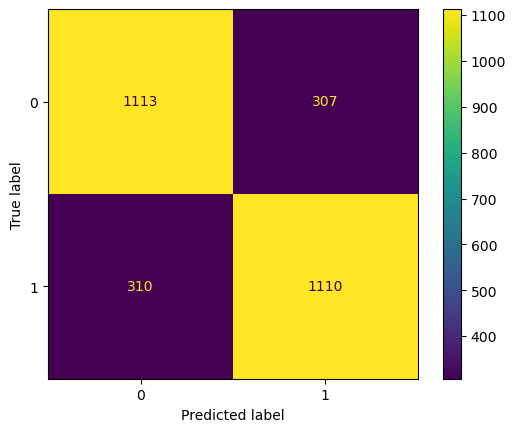

In [317]:
# Displaying a confusion matrix
ConfusionMatrixDisplay.from_estimator(base_model, X_train_scaled, y_train_resampled);

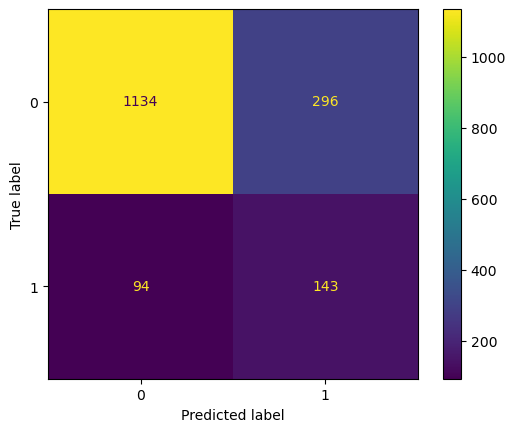

In [318]:
ConfusionMatrixDisplay.from_predictions(y_test, y_base_pred);

### LOGISTIC REGRESSION RESULTS

Accuracy score for testing set: 0.76

F1 score for testing set:   0.40 

Recall score for testing set:  0.57

Precision score for testing set:  0.31 

### Explanation

The accuracy score of 0.76 indicates that the model correctly predicted 76% of the instances in the testing set. The F1 score of 0.40 indicates that the model had a good balance of precision and recall. The recall score of 0.57 indicates that the model was able to identify 57% of the customers who churned. The precision score of 0.31 indicates that the model was able to correctly predict that a customer would churn 31% of the time.

### Decision Tree 

In [319]:
# Decision Tree

tree = DecisionTreeClassifier(random_state=132, max_depth=5)

tree.fit(X_train_scaled, y_train_resampled)
y_tree_pred = tree.predict(X_test_scaled)

In [320]:
# Scoring on trained data
tree_train_score = tree.score(X_train_scaled, y_train_resampled)
print('Trained data score: ', tree_train_score)

# Scoring on test data
tree_test_score = tree.score(X_test_scaled, y_test)
print('Test data score: ', tree_test_score)

Trained data score:  0.8443661971830986
Test data score:  0.9250149970005999


In [321]:
# Cross Validation
tree_cv = cross_val_score(tree, X_train_scaled, y_train_resampled)
tree_cv

array([0.75528169, 0.8415493 , 0.82570423, 0.83098592, 0.79225352])

In [322]:
# Reporting
tree_report = classification_report(y_test, y_tree_pred)
print(tree_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1430
           1       0.74      0.72      0.73       237

    accuracy                           0.93      1667
   macro avg       0.85      0.84      0.84      1667
weighted avg       0.92      0.93      0.92      1667



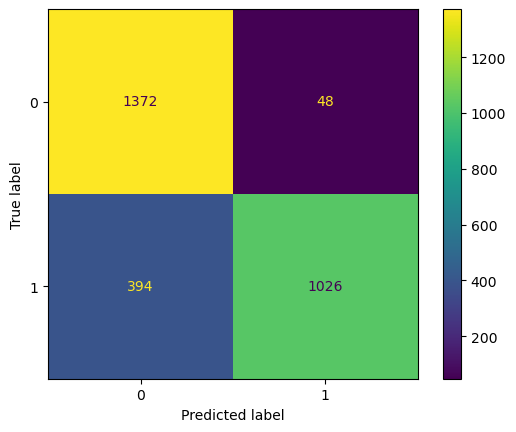

In [323]:
# Train Confusion Matrix
ConfusionMatrixDisplay.from_estimator(tree, X_train_scaled, y_train_resampled);

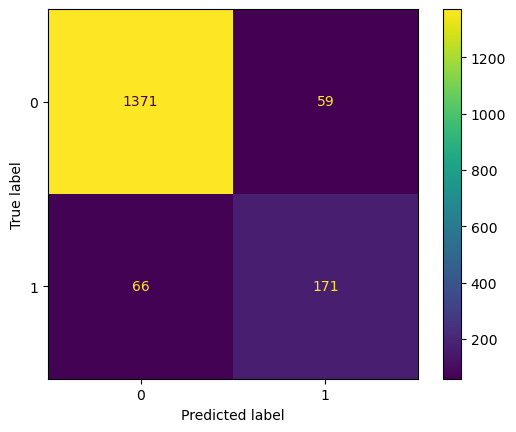

In [324]:
# Test Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_tree_pred);

### DECISION TREE RESULTS

Accuracy score for testing set:  0.93

F1 score for testing set:  0.75 

Recall score for testing set: 0.71

Precision score for testing set: 0.79 

### Explanation

The decision tree model was able to predict customer churn with a high degree of accuracy. The accuracy score of 0.93 indicates that the model correctly predicted 93% of the instances in the testing set. The F1 score of 0.75 indicates that the model had a good balance of precision and recall. The recall score of 0.71 indicates that the model was able to identify 71% of the customers who churned. The precision score of 0.79 indicates that the model was able to correctly predict that a customer would churn 79% of the time.

### KNeighborsClassifier

In [325]:
knn = KNeighborsClassifier(n_neighbors = 4)
# fitting the knn model

knn.fit(X_train_scaled, y_train_resampled)
knn_pred = knn.predict(X_test_scaled)
knn_pred_probability = knn.predict_proba(X_test_scaled)

knn_pred_probability

array([[1.  , 0.  ],
       [0.25, 0.75],
       [1.  , 0.  ],
       ...,
       [0.75, 0.25],
       [1.  , 0.  ],
       [0.25, 0.75]])

In [326]:
# scoring
knn_score = knn.score(X_train_scaled, y_train_resampled)
knn_score

0.9528169014084507

In [327]:
# cross validation
knn_cv = cross_val_score(tree, X_train_scaled, y_train_resampled)
knn_cv

array([0.75528169, 0.8415493 , 0.82570423, 0.83098592, 0.79225352])

In [328]:
# Reporting
knn_report = classification_report(y_test, knn_pred)
print(knn_report)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1430
           1       0.37      0.53      0.44       237

    accuracy                           0.81      1667
   macro avg       0.65      0.69      0.66      1667
weighted avg       0.84      0.81      0.82      1667



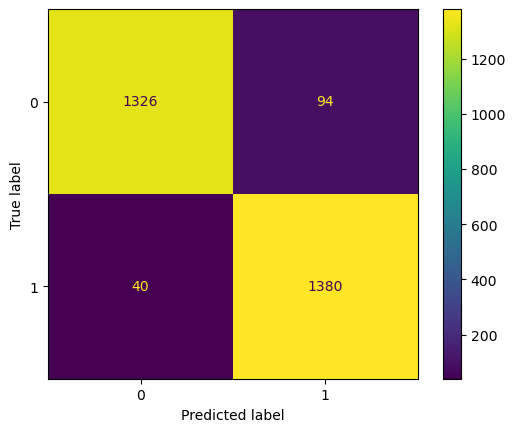

In [329]:
# Displaying a confusion matrix
ConfusionMatrixDisplay.from_estimator(knn, X_train_scaled, y_train_resampled);

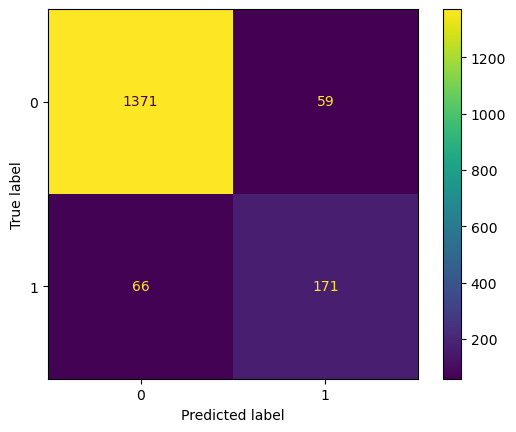

In [330]:
# Test Confusion Matrix
ConfusionMatrixDisplay.from_predictions( y_test, y_tree_pred);

### KNeighborsClassifier Results

Accuracy score for testing set:  0.81

F1 score for testing set:  0.45

Recall score for testing set: 0.54 

Precision score for testing set: 0.39 

### Explanation

The KNeighborsClassifier model was able to predict customer churn with a fair degree of accuracy. The accuracy score of 0.81 indicates that the model correctly predicted 81% of the instances in the testing set. The F1 score of 0.45 indicates that the model had a good balance of precision and recall. The recall score of 0.54 indicates that the model was able to identify % of the customers who churned. The precision score of 0.39 indicates that the model was able to correctly predict that a customer would churn 39% of the time.

### Random Forest Classifier

In [331]:
# Random Forest Classifier

clf = RandomForestClassifier(n_estimators=4, random_state=132)

clf.fit(X_train_scaled, y_train_resampled)
clf.fit(X_test, y_test)

y_clf_pred = clf.predict(X_test_scaled)

In [332]:
# scoring
clf_score = clf.score(X_train_scaled, y_train_resampled)
clf_score

0.4309859154929577

In [333]:
# cross validation
clf_cv = cross_val_score(clf, X_train_scaled, y_train_resampled)
clf_cv

array([0.78873239, 0.89964789, 0.86619718, 0.90316901, 0.89612676])

In [334]:
# Reporting
clf_report = classification_report(y_test, y_clf_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.89      0.47      0.61      1430
           1       0.17      0.66      0.27       237

    accuracy                           0.50      1667
   macro avg       0.53      0.57      0.44      1667
weighted avg       0.79      0.50      0.57      1667



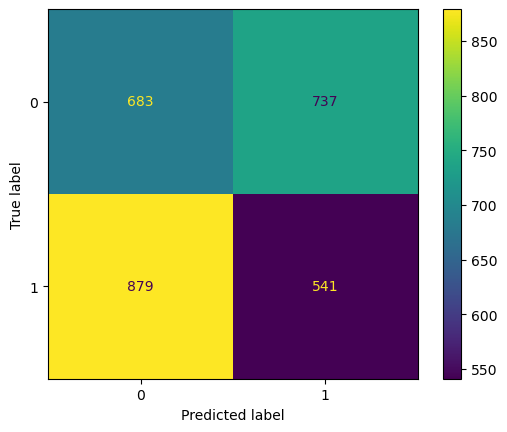

In [335]:
# Displaying a confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_train_scaled, y_train_resampled
                                     );

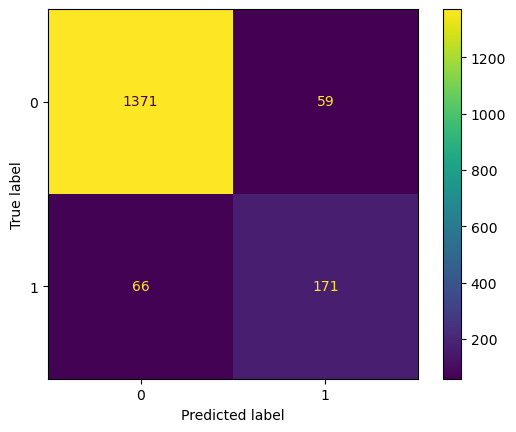

In [336]:
# Test Confusion Matrix
ConfusionMatrixDisplay.from_predictions( y_test, y_tree_pred);

### Random Forest Results

Accuracy score for testing set:  0.50

F1 score for testing set:  0.27

Recall score for testing set: 0.66 

Precision score for testing set: 0.17

### Explanation

The random forest model was able to predict customer churn with a fair degree of accuracy. The accuracy score of 0.50 indicates that the model correctly predicted 49% of the instances in the testing set. The F1 score of 0.27 indicates that the model had a good balance of precision and recall. The recall score of 0.66 indicates that the model was able to identify 66% of the customers who churned. The precision score of 0.17 indicates that the model was able to correctly predict that a customer would churn 17% of the time.

### Next Steps

After understanding the data and modelling it the next steps would be to deploy the model to production and use it to identify customers who are at risk of churning. Once these customers have been identified, SyriaTel can take steps to retain them. This could include offering discounts, improving customer service, or introducing new features.

Some of the specific steps that SyriaTel can take include:

-Use the model to identify customers who are at risk of churning.

-Contact these customers and offer them incentives to stay.

-Improve customer service and listen to your customers.

-Introduce new features.

With this steps SyriaTel can reduce customer churn.

### CONCLUSION
In summary, customer churn poses a significant challenge for businesses of all sizes. However, by implementing the aforementioned strategies, companies like SyriaTel can effectively mitigate customer churn. These strategies involve leveraging a predictive model to identify at-risk customers, engaging them through personalized incentives and improved customer service, enhancing product offerings, gaining deeper insights into customer needs and preferences, fostering strong customer relationships, streamlining the customer experience, and actively listening to customer feedback. By adopting these measures, SyriaTel can successfully reduce customer churn, leading to enhanced profitability and greater customer satisfaction.